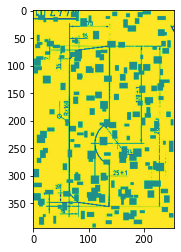

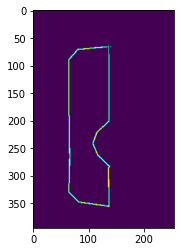

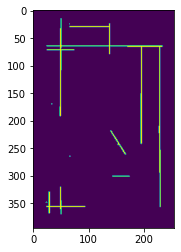

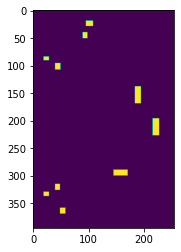

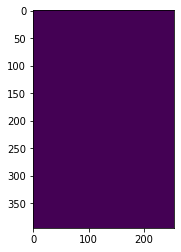

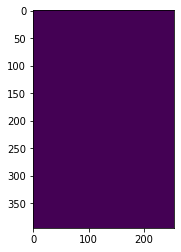

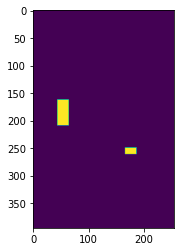

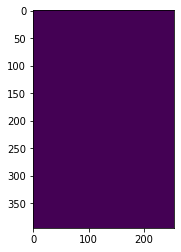

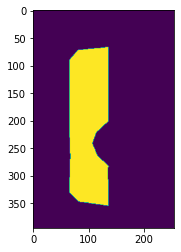

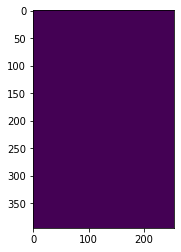

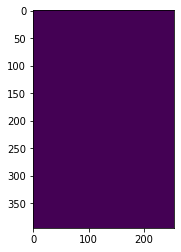

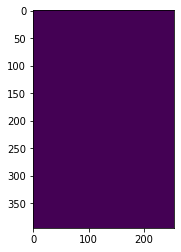

In [4]:
import matplotlib.pyplot as plt

from dataset import get_dataloaders_supervised

_, dataloader_train, _, dataloader_test = get_dataloaders_supervised(root='test', shuffle_seed=1)

img, mask = next(iter(dataloader_train))
img, mask = img.squeeze().numpy(), mask.squeeze().float().numpy()

plt.imshow(img.squeeze())
plt.show()

for i in range(mask.shape[0]):
    plt.imshow(mask[i, :])
    plt.show()

In [22]:
import random

def mask_dropout(cnt):
    def res(img, mask):
        img, mask = img.copy(), mask.copy()
        channels = random.sample(range(mask.shape[1]), cnt)

        for channel in channels:
            img[mask[:, channel] == 1] = 0
            mask[mask[:, channel] == 1] = 0

        return img, mask

    return res

img, mask = next(iter(dataloader_train))
img, mask = img.numpy(), mask.numpy()

test = mask[:, 3] == 1

aug = mask_dropout(3)

img, mask = img.squeeze(0), mask.squeeze()

aug(img, mask)

plt.imshow(img.squeeze())
plt.show()

for i in range(mask.shape[0]):
    plt.imshow(mask[i, :])
    plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 11